###Просто кликни play

In [16]:
import pandas as pd
import numpy as np
from PIL import Image, ImageFont, ImageDraw 

In [17]:
!git clone https://github.com/aksenovma1997/psychotype_test

fatal: destination path 'psychotype_test' already exists and is not an empty directory.


In [18]:
df_path = "/content/psychotype_test/pt_voca.xlsx"
df = pd.read_excel(df_path)
df["group"] = df["group"].astype(str)
df["rate"] = np.nan
df = df.sample(frac=1).reset_index(drop=True)
num_groups = df.shape[0]

In [19]:
def get_questions(df):
  for index, row in df.iterrows():
    curr_rate = input(row["group"] + ' (' + str(index+1) + '/' + str(num_groups) + ') ')
    if curr_rate.isnumeric() == False:
      curr_rate = np.nan
    else:
      curr_rate = int(curr_rate)
      if curr_rate < 0:
        curr_rate = 0
      elif curr_rate > 3:
        curr_rate = 3
    df.at[index, "rate"] = curr_rate
  return df

###Опрос

Пройдите опрос для определения вашего музыкального психотипа. Вам будут предложены музыкальные группы, которые требуется оценить от 0 до 3, где:

0 — в моём плейлисте нет треков этой группы

1 — в моём плейлисте один-два трека этой группы

2 — в моём плейлисте несколько треков этой группы

3 — в моём плейлисте куча треков этой группы

Для начала опроса кликни play в следующем блоке...

In [21]:
df = get_questions(df)

смысловые галлюцинации (1/126) 1
любэ (2/126) 1
скриптонит (3/126) 1
гражданская оборона (4/126) 1
vera (5/126) 
мукка (6/126) 1
король и шут (7/126) 1
ляпис трубецкой (8/126) 1
niletto (9/126) 1
даша онзероад (10/126) 1
iowa (11/126) 1
noize mc (12/126) 1
платина (13/126) 1
гречка (14/126) 1
mary gu (15/126) 1
макс барских (16/126) 1
серебро (17/126) 1
ssshhhiiittt! (18/126) 1
алена швец (19/126) 1
валентин стрыкало (20/126) 1
kedr livanskiy (21/126) 1
ани лорак (22/126) 1
чиж и co (23/126) 1
папин олимпос (24/126) 1
монеточка (25/126) 1
кукрыниксы (26/126) 1
ария (27/126) 1
щенки (28/126) 1
звери (29/126) 1
федук (30/126) 1
нонконформистка (31/126) 1
моргенштерн (32/126) 1
порнофильмы (33/126) 1
мот (34/126) 1
найтивыход (35/126) 1
botanichesky sad (36/126) 1
завтра брошу (37/126) 1
дайте танк (38/126) 1
jony (39/126) 1
фэйс (40/126) 1
артём качер (41/126) 1
пошлая молли (42/126) 1
лсп (43/126) 1
эпидемия (44/126) 1
t-fest (45/126) 1
ёлка (46/126) 1
polnalyubvi (47/126) 1
og buda (48

###Просто кликни play

In [22]:
df = df.sort_values(["type", "rate"], ascending=[True, False]).reset_index(drop=True)
df2 = df.groupby("type").agg(top = ("group", lambda x: ','.join(x)), type_count = ("rate", "count"), type_sum = ("rate", "sum")).reset_index()
df2["type_percent"] = df2["type_sum"] ** 2 / (df2["type_count"] * 3) / df2["type_sum"].sum()
df2["percent"] = round(df2["type_percent"] * 100 / df2["type_percent"].sum())
df2 = df2.drop(columns=["type_count", "type_sum", "type_percent"])
df2 = df2.sort_values(["percent"], ascending=False).reset_index(drop=True)

In [23]:
image_path = '/content/psychotype_test/pt' + str(df2.iloc[0]["type"]) + ".png"
result_image = Image.open(image_path)

In [24]:
schema_path = "/content/psychotype_test/template.jpg"
font_path = "/content/psychotype_test/bsr.OTF"
result_schema = Image.open(schema_path)
draw = ImageDraw.Draw(result_schema)
font = ImageFont.truetype(font_path, 20)

In [25]:
for index, row in df2.iterrows():
  curr_top = '\n'.join(row["top"].split(',')[:5])
  curr_text = str(int(row["percent"])) + '%\n\n' + curr_top
  x_pos = 250 + ((int(row["type"]) - 1) % 2) * 375
  y_pos = 50 + ((int(row["type"]) - 1) // 2) * 240
  draw.text((x_pos, y_pos), curr_text, fill="black", font=font)

###Результаты

Чтобы узнать результат, кликни play в следующем блоке...

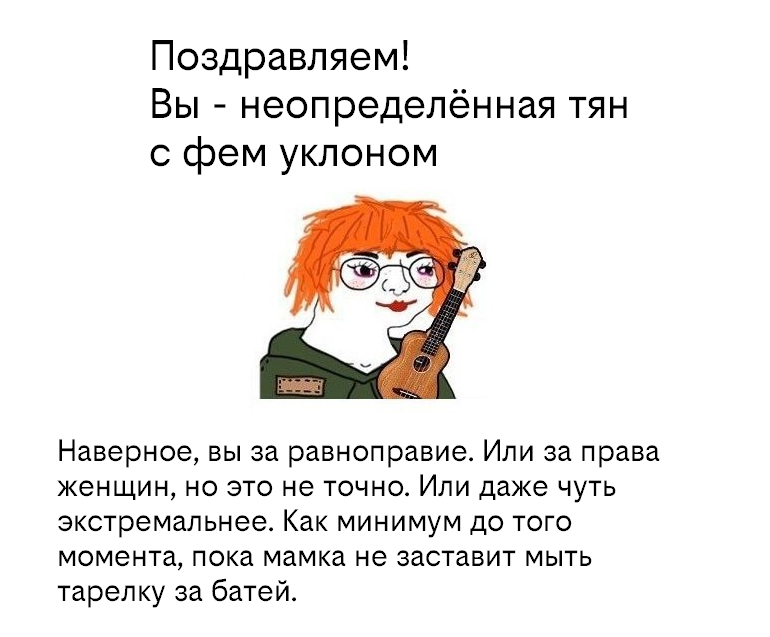

In [26]:
result_image

Чтобы узнать расширенный результат, кликни play в следующем блоке...

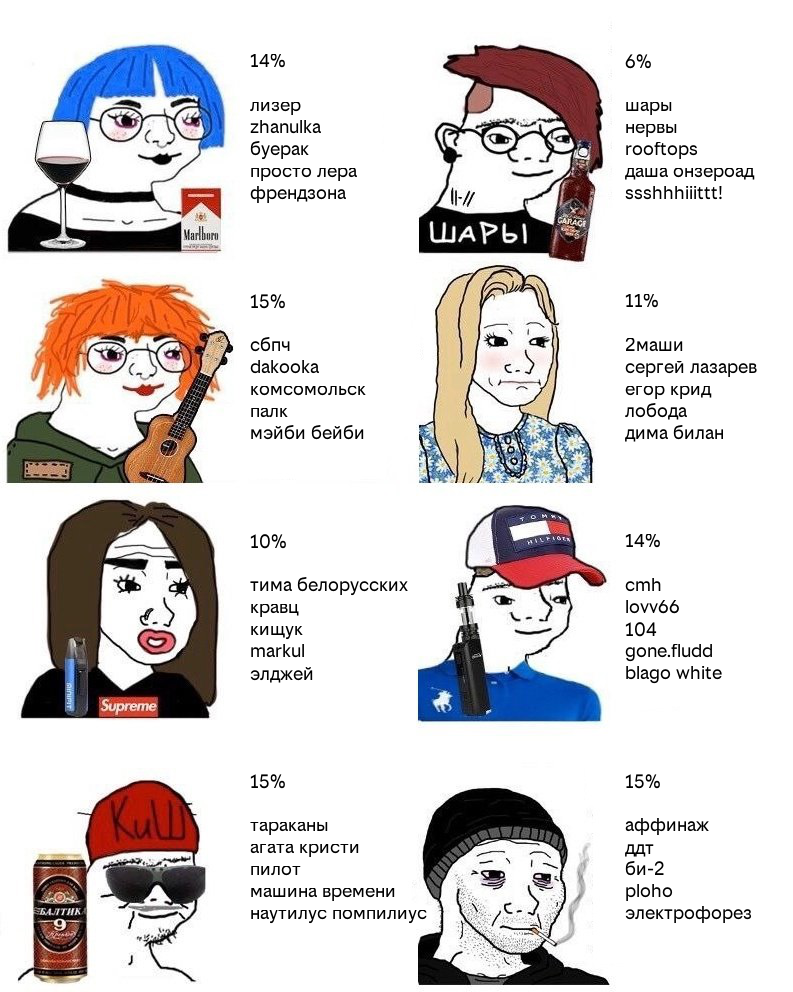

In [27]:
result_schema